In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os


import keras
import tensorflow

from keras_preprocessing.image import ImageDataGenerator
from keras_preprocessing.image import img_to_array, load_img

from keras.applications.vgg19 import VGG19, preprocess_input, decode_predictions


In [2]:
train_datagen = ImageDataGenerator(zoom_range= 0.5,
                                    shear_range= 0.3,
                                    horizontal_flip= True,
                                    preprocessing_function= preprocess_input)

val_datagen = ImageDataGenerator(preprocessing_function= preprocess_input)

In [3]:
train = train_datagen.flow_from_directory(
    directory="New Plant Diseases Dataset(Augmented)/train",
    target_size= (256, 256),
    batch_size= 32)

val = val_datagen.flow_from_directory(
    directory="New Plant Diseases Dataset(Augmented)/valid",
    target_size= (256, 256),
    batch_size= 32)

Found 70295 images belonging to 38 classes.
Found 17572 images belonging to 38 classes.


In [4]:
t_img, label = train.next()

In [5]:
def plotImage(img_arr, label):
    for im, l in zip(img_arr, label):
        plt.figure(figsize= (5, 5))
        plt.imshow(im/255)
        plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


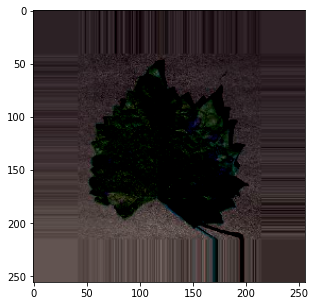

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


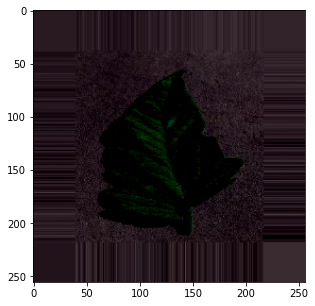

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


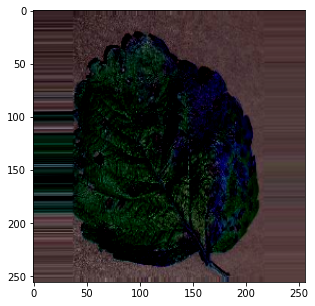

In [6]:
plotImage(t_img[:3], label[:3])

Building the Model

In [7]:
from keras.layers import Dense, Flatten
from keras.models import Model
from keras.applications.vgg19 import VGG19
import keras

In [8]:
base_model = VGG19(input_shape=(256, 256, 3), include_top=False)

In [9]:
for layer in base_model.layers:
    layer.trainable = False

In [10]:
X = Flatten()(base_model.output)

X = Dense(units = 38, activation='softmax')(X)

# Creating the Model
model = Model(base_model.input, X)

In [11]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [12]:
model.compile(optimizer= 'adam',
            loss= keras.losses.categorical_crossentropy,
            metrics=['accuracy'])

Early Stopping and Model Check Point

In [13]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

# Early Stopping
es = EarlyStopping(monitor='val_accuracy',
                    min_delta=0.01,
                    patience= 3,
                    verbose= 1)

# Model Check Point
mc = ModelCheckpoint(filepath="best_model.h5",
                    monitor='val_accuracy',
                    min_delta=0.01, patience= 3,
                    verbose= 1,
                    save_best_only= True)

cb = [es, mc]

In [18]:
# History
his = model.fit(train,
                steps_per_epoch= 10,
                epochs= 50,
                verbose=1,
                callbacks= cb,
                validation_data= val,
                validation_steps= 10)

Epoch 1/50
10/10 [==============================] - ETA: 0s - loss: 31.7226 - accuracy: 0.0875 
Epoch 1: val_accuracy improved from -inf to 0.26875, saving model to best_model.h5
10/10 [==============================] - 440s 45s/step - loss: 31.7226 - accuracy: 0.0875 - val_loss: 25.3086 - val_accuracy: 0.2688
Epoch 2/50
10/10 [==============================] - ETA: 0s - loss: 25.9363 - accuracy: 0.2719 
Epoch 2: val_accuracy improved from 0.26875 to 0.44688, saving model to best_model.h5
10/10 [==============================] - 404s 42s/step - loss: 25.9363 - accuracy: 0.2719 - val_loss: 13.5585 - val_accuracy: 0.4469
Epoch 3/50
10/10 [==============================] - ETA: 0s - loss: 13.0329 - accuracy: 0.4469 
Epoch 3: val_accuracy improved from 0.44688 to 0.54375, saving model to best_model.h5
10/10 [==============================] - 416s 44s/step - loss: 13.0329 - accuracy: 0.4469 - val_loss: 11.6608 - val_accuracy: 0.5437
Epoch 4/50
10/10 [==============================] - ETA: 0

In [ ]:
h = his.history

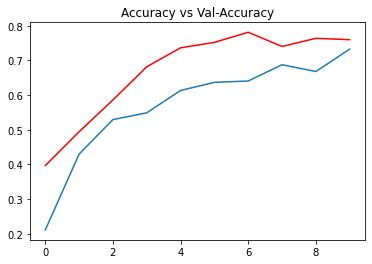

In [ ]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'], c = "red")
plt.title("Accuracy vs Val-Accuracy")
plt.show()

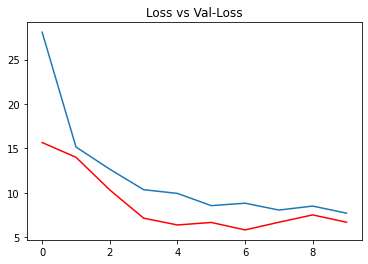

In [ ]:
plt.plot(h['loss'])
plt.plot(h['val_loss'], c = "red")
plt.title("Loss vs Val-Loss")
plt.show()


In [14]:
# Load Best Model
from keras.models import load_model

model = load_model("best_model.h5")

In [15]:
ref = dict(zip(list(train.class_indices.values()),
            list(train.class_indices.keys())))

In [17]:
def prediction(path):
    img = load_img(path, target_size= (256, 256))

    i = img_to_array(img)
    plt.imshow(img)
    plt.show()
    plt.imshow(i)
    plt.show()

    im = preprocess_input(i)
    plt.imshow(im)
    plt.show()
    
    img = np.expand_dims(im, axis=0)

    pred = np.argmax(model.predict(img))
    print(f"The image belongs to - {ref[pred]}")

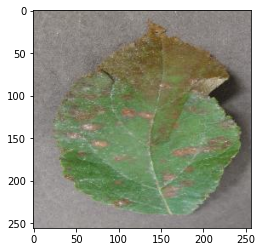

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


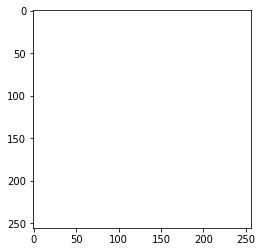

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


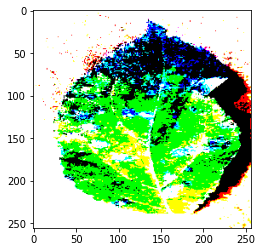

1/1 [==============================] - 3s 3s/step
The image belongs to - Apple___Cedar_apple_rust


In [18]:
path = "R:/Plant Disease Detection Project/test/test/AppleCedarRust4.JPG"
prediction(path)